Data Preprocessing

importing libraries

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

Importing dataset

In [2]:
df=pd.read_csv('/content/Data.csv')

Data description

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [4]:
df.describe()

,Age,Salary
count,9.000000,9.000000
mean,38.777778,63777.777778
std,7.693793,12265.579662
min,27.000000,48000.000000
25%,35.000000,54000.000000
50%,38.000000,61000.000000
75%,44.000000,72000.000000
max,50.000000,83000.000000


handling missing values

In [5]:
df.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


In [6]:
mean_A=df['Age'].mean()

In [9]:
mean_S=df['Salary'].mean()

In [11]:
mean_A=df['Age'].mean()
mean_S=df['Salary'].mean()

for i in range(len(df)):
  if pd.isnull(df.loc[i,'Age']):
    df.loc[i,'Age']=mean_A
  if pd.isnull(df.loc[i,'Salary']):
    df.loc[i,'Salary']=mean_S

In [12]:
df.isnull().sum()

,0
Country,0
Age,0
Salary,0
Purchased,0


In [13]:
df.head(10)

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


Encoding categorical data

Label encoding

In [17]:
le=LabelEncoder()
df["Purchased"]=le.fit_transform(df["Purchased"])
df.head(10)

,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,0
1,Spain,27.000000,48000.000000,1
2,Germany,30.000000,54000.000000,0
3,Spain,38.000000,61000.000000,0
4,Germany,40.000000,63777.777778,1
5,France,35.000000,58000.000000,1
6,Spain,38.777778,52000.000000,0
7,France,48.000000,79000.000000,1
8,Germany,50.000000,83000.000000,0
9,France,37.000000,67000.000000,1


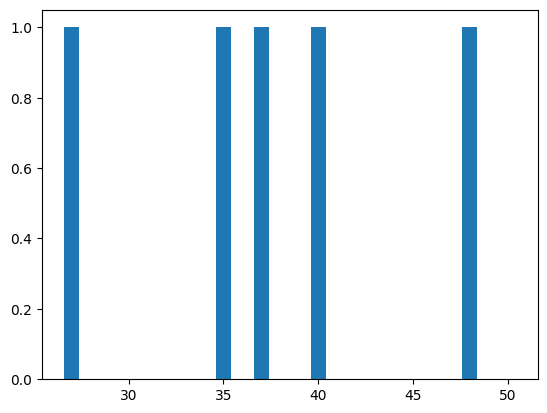

In [35]:
x1=np.array(df['Age'])
x2=np.array(df['Salary'])

y=np.array(df['Purchased'])
plt.bar(x1,y)
plt.show()





<Axes: xlabel='Purchased', ylabel='Salary'>

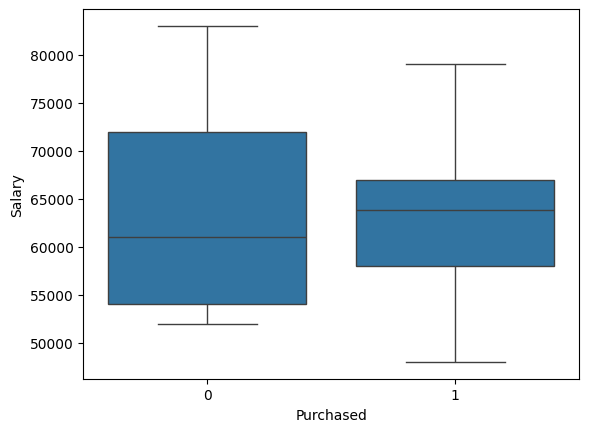

In [37]:
import seaborn as sns
sns.boxplot(x='Purchased',y='Salary',data=df)

<Axes: xlabel='Purchased', ylabel='Age'>

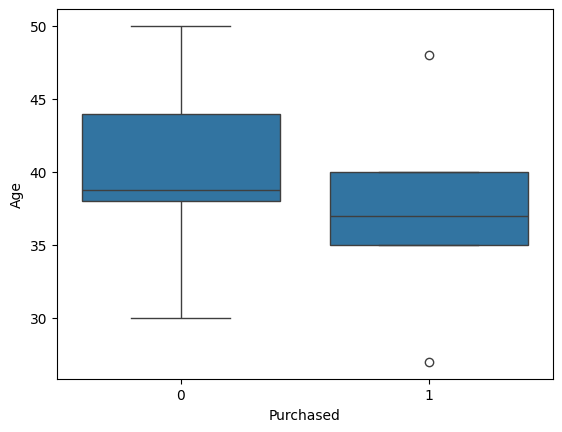

In [38]:
import seaborn as sns
sns.boxplot(x='Purchased',y='Age',data=df)

one hot encoding method

In [41]:
df_encoded = pd.get_dummies(df, columns=['Country'], dtype=int)

In [43]:
df_encoded

,Age,Salary,Purchased,Country_0,Country_1,Country_2
0,44.000000,72000.000000,0,1,0,0
1,27.000000,48000.000000,1,0,0,1
2,30.000000,54000.000000,0,0,1,0
3,38.000000,61000.000000,0,0,0,1
4,40.000000,63777.777778,1,0,1,0
5,35.000000,58000.000000,1,1,0,0
6,38.777778,52000.000000,0,0,0,1
7,48.000000,79000.000000,1,1,0,0
8,50.000000,83000.000000,0,0,1,0
9,37.000000,67000.000000,1,1,0,0


In [47]:
country_purchases = df_encoded.groupby(['Country_0', 'Country_1', 'Country_2'])['Purchased'].sum().reset_index()
country_purchases['Country'] = country_purchases.apply(lambda row: 'France' if row['Country_0'] == 1 else ('Germany' if row['Country_1'] == 1 else 'Spain'), axis=1)
most_purchased_country = country_purchases.sort_values(by='Purchased', ascending=False).iloc[0]

print(f"The country with the most purchases is: {most_purchased_country['Country']} with {most_purchased_country['Purchased']} purchases.")

The country with the most purchases is: France with 3 purchases.
